###Problem 1: Rotation Matrix from Roll-Pitch-Yaw

Given a set of Roll-Pitch-Yaw angles $(\phi,\theta,\psi)$, where $\phi$ is the roll angle around the x-axis, $\theta$ is the pitch angle around the y-axis, and $\psi$ is the yaw angle around the z-axis, your task is to write a Python function that computes the corresponding rotation matrix $R$. Use the following equations for your implementation:

$R = R_z(\psi)R_y(\theta)R_x(\phi)$,

where $R_x(\phi)$, $R_y(\theta)$ and $R_z(\psi)$ are the rotation matrices around the x, y, and z axes, respectively. The matrices are defined as:

$R_x(\phi)=\begin{bmatrix} 1 & 0 & 0 \\ 0 & cos(\phi) & -sin(\phi) \\ 0 & sin(\phi) & cos(\phi) \end{bmatrix}$

$R_y(\theta)=\begin{bmatrix} cos(\theta) & 0 & -sin(\theta) \\ 0 & 1 & 0 \\ sin(\theta) & 0 & cos(\theta) \end{bmatrix}$

$R_z(\psi)=\begin{bmatrix} cos(\psi) & -sin(\psi) & 0 \\sin(\psi) & cos(\psi) & 0 \\ 0 & 0 & 1 \end{bmatrix}$

Validate your solution by visualizing the axes of the original and rotated frames.

Rotation Matrix:
 [[ 0.35355339 -0.5732233   0.73919892]
 [ 0.61237244  0.73919892  0.28033009]
 [-0.70710678  0.35355339  0.61237244]]


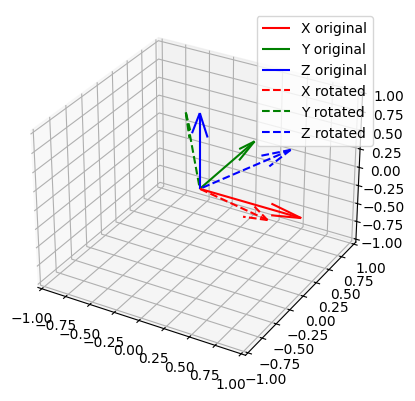

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def rotation_matrix_from_rpy(roll, pitch, yaw):
    # Convert degrees to radians
    roll, pitch, yaw = np.radians([roll, pitch, yaw])

    Rx = np.array(
        [[1, 0, 0], [0, np.cos(roll), -np.sin(roll)], [0, np.sin(roll), np.cos(roll)]]
    )

    Ry = np.array(
        [
            [np.cos(pitch), 0, np.sin(pitch)],
            [0, 1, 0],
            [-np.sin(pitch), 0, np.cos(pitch)],
        ]
    )

    Rz = np.array(
        [[np.cos(yaw), -np.sin(yaw), 0], [np.sin(yaw), np.cos(yaw), 0], [0, 0, 1]]
    )

    R = Rz @ Ry @ Rx
    return R


# Example usage
roll, pitch, yaw = 30, 45, 60
R = rotation_matrix_from_rpy(roll, pitch, yaw)
print("Rotation Matrix:\n", R)


# Visualization
def visualize_rotation(R):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    # Initial unit vectors
    vectors = np.eye(3)
    ax.quiver(
        0,
        0,
        0,
        vectors[0, 0],
        vectors[1, 0],
        vectors[2, 0],
        color="r",
        label="X original",
    )
    ax.quiver(
        0,
        0,
        0,
        vectors[0, 1],
        vectors[1, 1],
        vectors[2, 1],
        color="g",
        label="Y original",
    )
    ax.quiver(
        0,
        0,
        0,
        vectors[0, 2],
        vectors[1, 2],
        vectors[2, 2],
        color="b",
        label="Z original",
    )
    # Rotated vectors
    rotated_vectors = R @ vectors
    ax.quiver(
        0,
        0,
        0,
        rotated_vectors[0, 0],
        rotated_vectors[1, 0],
        rotated_vectors[2, 0],
        color="r",
        linestyle="dashed",
        label="X rotated",
    )
    ax.quiver(
        0,
        0,
        0,
        rotated_vectors[0, 1],
        rotated_vectors[1, 1],
        rotated_vectors[2, 1],
        color="g",
        linestyle="dashed",
        label="Y rotated",
    )
    ax.quiver(
        0,
        0,
        0,
        rotated_vectors[0, 2],
        rotated_vectors[1, 2],
        rotated_vectors[2, 2],
        color="b",
        linestyle="dashed",
        label="Z rotated",
    )
    ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
    ax.legend()
    plt.show()


visualize_rotation(R)

###Problem 2: Finding Roll-Pitch-Yaw from Rotation Matrix
Given a rotation matrix $R$, determine the corresponding Roll-Pitch-Yaw angles $(\phi,\theta,\psi)$. The equations relating the matrix elements to the angles are:

$\theta = arcsin(-R_{31})$

$\phi = arctan2(R_{32}, R_{33})$

$\psi = arctan2(R_{21}, R_{11})$

Write a Python function that takes in a rotation matrix and outputs the Roll-Pitch-Yaw angles. Test your function with a known set of angles and rotation matrix, and visualize the result to ensure correctness.

In [2]:
def rpy_from_rotation_matrix(R):
    pitch = np.arcsin(-R[2, 0])
    roll = np.arctan2(R[2, 1], R[2, 2])
    yaw = np.arctan2(R[1, 0], R[0, 0])
    # Convert radians to degrees
    roll, pitch, yaw = np.degrees([roll, pitch, yaw])
    return roll, pitch, yaw


# Use the rotation matrix from Problem 1 as an example
roll, pitch, yaw = rpy_from_rotation_matrix(R)
print("Recovered Roll-Pitch-Yaw angles (degrees):", roll, pitch, yaw)

Recovered Roll-Pitch-Yaw angles (degrees): 29.999999999999996 44.99999999999999 59.99999999999999


###Problem 3: Quaternion to Rotation Matrix Conversion
Quaternions offer a compact way to represent rotations. Given a unit quaternion $q=(w,x,y,z)$, write a Python function to convert it into a corresponding rotation matrix $R$. The relation is given by:

$R=\begin{bmatrix} 1-2y^2 - 2z^2 & 2xy-2zw & 2xz+2yw \\ 2xy+2zw & 1-2x^2-2z^2 & 2yz - 2xw \\ 2xz - 2yw & 2yz+2xw & 1-2x^2-2y^2 \end{bmatrix}$

Ensure the quaternion is normalized before conversion. Demonstrate the correctness of your function through visualization.

Rotation Matrix from Quaternion:
 [[-2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00 -2.22044605e-16]]


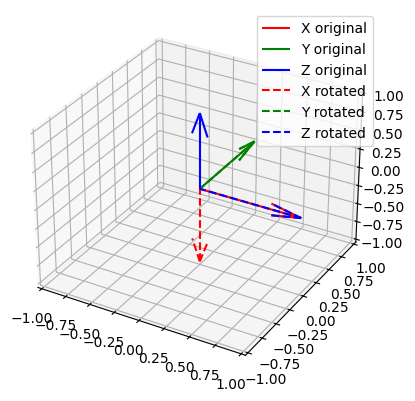

In [3]:
def rotation_matrix_from_quaternion(q):
    w, x, y, z = q / np.linalg.norm(q)  # Ensure quaternion is normalized
    R = np.array(
        [
            [1 - 2 * y**2 - 2 * z**2, 2 * x * y - 2 * z * w, 2 * x * z + 2 * y * w],
            [2 * x * y + 2 * z * w, 1 - 2 * x**2 - 2 * z**2, 2 * y * z - 2 * x * w],
            [2 * x * z - 2 * y * w, 2 * y * z + 2 * x * w, 1 - 2 * x**2 - 2 * y**2],
        ]
    )
    return R


# Example quaternion (normalized)
q = np.array(
    [0.707, 0, 0.707, 0]
)  # Represents a rotation of 90 degrees around the x-axis
R_from_q = rotation_matrix_from_quaternion(q)
print("Rotation Matrix from Quaternion:\n", R_from_q)

visualize_rotation(R_from_q)

### Problem 4: Slerp (Spherical Linear Interpolation) between Quaternions
Given two unit quaternions $q_1$ and $q_2$, representing the start and end orientations, and a fraction $t\in[0,1]$, implement the Slerp algorithm to find the intermediate quaternion $q_t$ that represents the orientation at fraction $t$ between the two orientations. The Slerp formula is:

$q_t = \frac{sin((1-t)\Omega)}{sin(\Omega)}q_{1} + \frac{sin(t\Omega)}{sin(\Omega)}q_{2}$

where $\Omega = arccos(q_1^{\intercal}q_{2})$ is the dot product of the quaternions.

Validate your solution by interpolating between two known orientations and visualizing the intermediate orientations.

Interpolated Quaternion: [0.92385064 0.         0.38263761 0.        ]
Rotation Matrix from Slerp Interpolated Quaternion:
 [[ 0.70715101  0.          0.70706255]
 [ 0.          1.          0.        ]
 [-0.70706255  0.          0.70715101]]


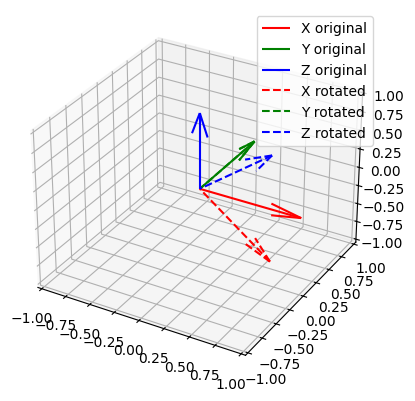

In [4]:
def slerp(q1, q2, t):
    dot = np.dot(q1, q2)
    # If dot product is negative, the quaternions have opposite handedness and slerp won't take
    # the shorter path. Fix by reversing one quaternion.
    if dot < 0.0:
        q1 = -q1
        dot = -dot
    dot = np.clip(dot, -1.0, 1.0)  # Clamp dot product to stay within domain of acos()
    theta_0 = np.arccos(dot)  # Angle between input vectors
    sin_theta_0 = np.sin(theta_0)

    if sin_theta_0 < 1e-6:
        return (
            1.0 - t
        ) * q1 + t * q2  # If the angle is small, use linear interpolation

    sin_theta_t = np.sin(theta_0 * t)
    sin_theta_1_t = np.sin(theta_0 * (1 - t))

    s1 = sin_theta_1_t / sin_theta_0
    s2 = sin_theta_t / sin_theta_0

    return s1 * q1 + s2 * q2


# Example quaternions and interpolation
q1 = np.array([1, 0, 0, 0])  # No rotation
q2 = np.array([0.707, 0, 0.707, 0])  # 90 degrees rotation around x-axis
t = 0.5  # Halfway between q1 and q2
qt = slerp(q1, q2, t)

R_slerp = rotation_matrix_from_quaternion(qt)
print("Interpolated Quaternion:", qt)
print("Rotation Matrix from Slerp Interpolated Quaternion:\n", R_slerp)

visualize_rotation(R_slerp)

###Problem 5: Angular Velocity Vector to Skew-Symmetric Matrix
Given an angular velocity vector $\omega = [\omega_x, \omega_y, \omega_z]^{\intercal}$, your task is to write a Python function that converts this vector into its corresponding skew-symmetric matrix $[\omega]_{\times}$. The skew-symmetric matrix is used in computing cross products and is defined as:

$[\omega]_{\times}=\begin{bmatrix} 0 & -\omega_z & \omega_y \\ \omega_z & 0 & -\omega_x \\ -\omega_y & \omega_x & 0 \end{bmatrix}$

This matrix is crucial in representing angular velocities in rigid body dynamics and robotics.

In [5]:
import numpy as np


def angular_velocity_to_skew_symmetric(omega):
    """
    Converts an angular velocity vector to a skew-symmetric matrix.

    Parameters:
    - omega: A numpy array representing the angular velocity vector [omega_x, omega_y, omega_z].

    Returns:
    - A 3x3 numpy array representing the skew-symmetric matrix.
    """
    omega_x, omega_y, omega_z = omega
    skew_symmetric = np.array(
        [[0, -omega_z, omega_y], [omega_z, 0, -omega_x], [-omega_y, omega_x, 0]]
    )
    return skew_symmetric


# Example usage
omega = np.array([1, 2, 3])
skew_symmetric_matrix = angular_velocity_to_skew_symmetric(omega)
print("Skew-Symmetric Matrix:\n", skew_symmetric_matrix)

Skew-Symmetric Matrix:
 [[ 0 -3  2]
 [ 3  0 -1]
 [-2  1  0]]


###Problem 6: Exponential Map for Rotation

Given an angular velocity vector $\omega$ and a time duration $t$, calculate the rotation matrix $R$ using the exponential map. The exponential map converts an angular velocity vector into a rotation matrix over the time $t$, assuming constant angular velocity. The rotation matrix $R$ can be obtained using Rodrigues' formula:

$R=\exp([\omega]_{\times}t) = I + sin(\theta)[\hat{\omega}]_{\times} + (1-cos(\theta))[\hat{\omega}]_{\times}^{2}$

where $\theta = \|\omega\| t$ is the magnitude of rotation, $I$ is the identity matrix, $\hat{\omega}= \omega/\|\omega\|$ is a normalized angular velocity vector, and $[\hat{\omega}]_{\times}$ is the skew-symmetric matrix of $\hat{\omega}$.

Rotation Matrix:
 [[-0.47492144  0.32944181  0.81603782]
 [ 0.85049534  0.41003142  0.32944181]
 [-0.22606924  0.85049534 -0.47492144]]


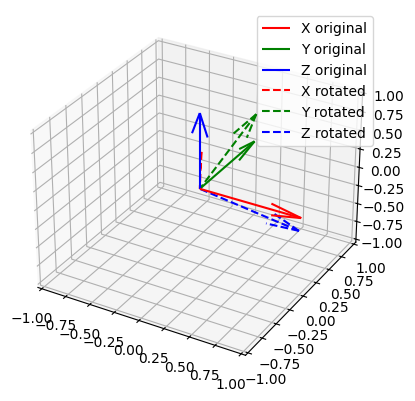

In [6]:
def exponential_map_rotation(omega, t):
    """
    Calculates the rotation matrix using the exponential map given an angular velocity and time.

    Parameters:
    - omega: A numpy array representing the angular velocity vector [omega_x, omega_y, omega_z].
    - t: Time duration.

    Returns:
    - A 3x3 numpy array representing the rotation matrix.
    """
    theta = np.linalg.norm(omega) * t
    if theta < np.finfo(float).eps:
        return np.eye(3)

    omega_normalized = omega / np.linalg.norm(omega)
    skew_symmetric = angular_velocity_to_skew_symmetric(omega_normalized)
    R = (
        np.eye(3)
        + np.sin(theta) * skew_symmetric
        + (1 - np.cos(theta)) * np.dot(skew_symmetric, skew_symmetric)
    )

    return R


# Example usage
omega = np.array([0.5, 1, 0.5])
t = 2  # seconds
R = exponential_map_rotation(omega, t)
print("Rotation Matrix:\n", R)

visualize_rotation(R)

###Problem 7: Constructing Homogeneous Transformation Matrices

Given a rotation matrix $R$ that represents the orientation of a rigid body and a position vector $p$ that represents the location of the body frame's origin in the world frame, construct the corresponding homogeneous transformation matrix $T$.

A homogeneous transformation matrix combines both rotation and translation information into a single 4x4 matrix:

$T=\begin{bmatrix} R & p \\ 0 & 1 \end{bmatrix}$

In [7]:
def construct_homogeneous_transformation(R, p):
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = p
    return T


# Example usage
R = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])
p = np.array([1, 2, 3])
T = construct_homogeneous_transformation(R, p)
print("Homogeneous Transformation Matrix:\n", T)

Homogeneous Transformation Matrix:
 [[ 0. -1.  0.  1.]
 [ 1.  0.  0.  2.]
 [ 0.  0.  1.  3.]
 [ 0.  0.  0.  1.]]


###Problem 8: Exponential Coordinates for Rigid-Body Motion

Given a twist vector $\xi = [\omega;v]$ representing a rigid body's screw motion and a scalar $\theta$ representing the motion magnitude (e.g., rotation angle and translation distance for a screw motion), compute the corresponding homogeneous transformation matrix using the exponential map:

$T=\exp(\hat{\xi}\theta)$

where $\hat{\xi}$ is the 4x4 matrix representation of the twist and $\theta$ is the motion magnitude.

1.__Compute the Homogeneous Transformation Matrix__: Compute the homogeneous transformation matrix, $T$, that encapsulates the rigid body's rotation and translation in 3D space.

2.__Visualize the Transformation__: Using matplotlib, create a 3D visualization that shows both the original position of the rigid body (as a semi-transparent unit cube) and its transformed position. Highlight the transformation effect by altering the appearance (e.g., color) of the transformed rigid body.

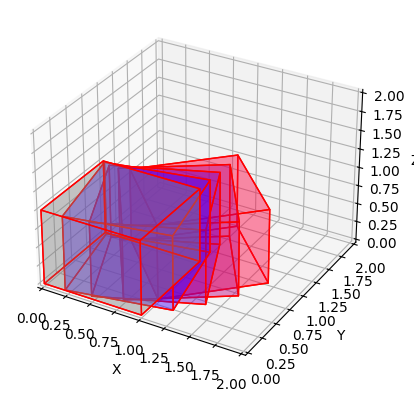

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


def twist_to_transformation(omega, v, theta):
    """Compute the homogeneous transformation matrix for a given twist and angle"""
    R = exponential_map_rotation(
        omega, theta
    )  # Rotation matrix from exponential map of omega
    p = (
        np.eye(3) * theta + (1.0 - np.cos(theta)) * R + (theta - np.sin(theta)) * R @ R
    ) @ v
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = p
    return T


def draw_cube(ax, T, color="blue"):
    """
    Draw a cube transformed by the homogeneous transformation matrix T.
    """
    # Vertices of a cube
    v = np.array(
        [
            [0, 0, 0, 1],
            [1, 0, 0, 1],
            [1, 1, 0, 1],
            [0, 1, 0, 1],
            [0, 0, 1, 1],
            [1, 0, 1, 1],
            [1, 1, 1, 1],
            [0, 1, 1, 1],
        ]
    )
    # Apply transformation
    v_transformed = np.dot(v, T.T)[:, :3]

    # Define the sides of the cube, each as a list of vertices
    verts = [
        [v_transformed[0], v_transformed[1], v_transformed[2], v_transformed[3]],
        [v_transformed[4], v_transformed[5], v_transformed[6], v_transformed[7]],
        [v_transformed[0], v_transformed[1], v_transformed[5], v_transformed[4]],
        [v_transformed[2], v_transformed[3], v_transformed[7], v_transformed[6]],
        [v_transformed[1], v_transformed[2], v_transformed[6], v_transformed[5]],
        [v_transformed[4], v_transformed[7], v_transformed[3], v_transformed[0]],
    ]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(verts, alpha=0.25, linewidths=1, edgecolors="r")
    poly3d.set_facecolor(color)
    ax.add_collection3d(poly3d)


def visualize_transformation(omega, v, theta):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    T1 = twist_to_transformation(omega, v, theta / 4)
    T2 = twist_to_transformation(omega, v, theta * 2 / 4)
    T3 = twist_to_transformation(omega, v, theta * 3 / 4)
    T4 = twist_to_transformation(omega, v, theta)
    draw_cube(ax, np.eye(4), "grey")  # Original cube in grey
    draw_cube(ax, T1, (1.0 / 4.0, 0.0, 1.0, 1.0))  # The cube transformed in theta/4
    draw_cube(
        ax, T2, (2.0 / 4.0, 0.0, 3.0 / 4.0, 1.0)
    )  # The cube transformed in theta*2/4
    draw_cube(
        ax, T3, (3.0 / 4.0, 0.0, 2.0 / 4.0, 1.0)
    )  # The cube transformed in theta*3/4
    draw_cube(ax, T4, (1.0, 0.0, 1.0 / 4.0, 1.0))  # The cube transformed in theta

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    ax.set_zlim([0, 2])
    plt.show()


# Example usage
omega = np.array([0, 0, 1])  # Rotation about z-axis
v = np.array([1, 0, 0])  # Translation along x-axis
theta = np.pi / 4  # Rotation angle (45 degrees)
visualize_transformation(omega, v, theta)